# <span style="color:blue">PROJETO: Previsão de Churn</span>

![churn](churn_bunner.png)

Um dos maiores problemas enfrentados pelas companhias é quando há uma perda de clientes e/ou receitas, este tipo de cancelamento pode ser medido através de uma métrica denominada **churn rate**.

Especialmente com o crescimento de modelos de negócios por assinatura, o Churn (ou índice de cancelamento de clientes) passou a ser mais conhecido.

Churn, numa definição mais generalista, é uma métrica que indica o número de clientes que cancelam em determinado período de tempo. Para calcular o churn, o que você precisa fazer é somar o número de clientes que cancelou seu produto/serviço no período analisado.

Para que uma empresa consiga fazer a expansão da sua base de clientes, é preciso que o número de novos clientes exceda o seu churn rate – a taxa de clientes cancelados.

### Qual a taxa ideal de Churn?
A melhor resposta é: o mais baixo possível. Mas é claro que entender qual a taxa ideal de churn para um negócio depende de muitos fatores. É quase impossível estimar um valor que seja verdadeiro para todo tipo de negócio. Em segmentos específicos temos alguns benchmarks. Para SaaS, por exemplo, o sugerido é algo entre 5% a 7% ao ano.

### Mas por que os clientes cancelam?
Alguns dos motivos que podem motivar seu cliente a cancelar, com base na nossa experiência,  podem ser:

* O cliente está sem fluxo de caixa e não pode mais arcar com a mensalidade do seu produto/serviço;
* Ele não consegue ver valor no produto/serviço;
* O cliente não teve suas expectativas atendidas;
* O produto ou serviço não acompanha as evoluções de mercado e perde em qualidade e ferramentas;
* O produto é bom, mas o serviço não – e vice versa;
* Seu cliente optou pelo produto da concorrência;
* Seu cliente foi adquirido por outra empresa e o comprador usa outro serviço;
* Crise financeira no mercado;
* Interrupção da operação durante um período de crise;
* Seu cliente faliu.

Identificar os principais motivos pelos quais os clientes cancelam, permite conhecer indicativos de uso do produto, qualidade do serviço, preço, competição de mercado, etc.

## Sobre a base de dados

Esse conjunto de dados foi retirado do *kaggle*, podendo ser acessado por este [link](https://www.kaggle.com/c/customer-churn-prediction-2020/data), **Customer Churn Prediction 2020** tem o objetivo de prever se um cliente mudará de provedor de telecomunicações.

Há dois conjuntos de dados, um para treino com 4250 linhas e 20 colunas e outro para teste com 750 linhas e 19 colunas, os dados de treino já vem com o histórico de clientes que cancelaram e não cancelaram o contrato com o provedor atual, enquanto que os dados de teste não vem com esse resultado.

Depois de ter criado o modelo, treinado e validado eu o utilizei para realizar as predições nos dados de teste e submeti ao site para obter o resultado.

## Sumário e Principais Resultados

### Algoritmo Final Selecionado

> Random Forest


### Métricas de Avaliação

> Acurária<br>
> Precision<br>
> Recall<br>
> f1-Score<br>
> Curva ROC<br>
> Curva PR<br>
> Matriz de confusão


### Index

    1. Importes
        1.1 Bibliotecas
        1.2 Conjunto de dados
    2. Análise Exploratória dos dados
        2.1 Descrição dos dados
        2.2 Análise das Variáveis categóricas
        2.3 Análise das Variáveis numéricas
        2.4 Analisando os outliers
        2.5 Análise de correlação
    3. Machine Learning
        3.1 Definindo a baseline
        3.2 Escolha do Modelo
        3.3 Ajustando o modelo
        3.4 Avaliando o modelo
        3.5 Variáveis importantes
    4. Treinamento com todos os dados
    5. Salvando o modelo
    6. Prevendo nos dados de teste
    7. Salvando os dados com as previsões
    8. Conclusões
    9. Referências


### Conclusões e Resultados
    BASELINE:
        Acurácia: 75.78%

    MODELO FINAL:
        Acurácia com dados de validação:      95.06%
        Acurácia com dados de teste (Kaggle): 92.95%


## 1. Importes

### 1.1 Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import interp

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from pprint import pprint

import eli5

import pickle

# from autoviz.AutoViz_Class import AutoViz_Class
# import sweetviz

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 1.2 Conjunto de dados

Dicionário das variáveis

* **state**: string. 2-letter code of the US state of customer residence
* **account_length**: numerical. Number of months the customer has been with the current telco provider
* **area_code**: string="area_code_AAA" where AAA = 3 digit area code.
* **international_plan**: (yes/no). The customer has international plan.
* **voice_mail_plan**: (yes/no). The customer has voice mail plan.
* **number_vmail_messages**: numerical. Number of voice-mail messages.
* **total_day_minutes**: numerical. Total minutes of day calls.
* **total_day_calls**: numerical. Total number of day calls.
* **total_day_charge**: numerical. Total charge of day calls.
* **total_eve_minutes**: numerical. Total minutes of evening calls.
* **total_eve_calls**: numerical. Total number of evening calls.
* **total_eve_charge**: numerical. Total charge of evening calls.
* **total_night_minutes**: numerical. Total minutes of night calls.
* **total_night_calls**: numerical. Total number of night calls.
* **total_night_charge**: numerical. Total charge of night calls.
* **total_intl_minutes**: numerical. Total minutes of international calls.
* **total_intl_calls**: numerical. Total number of international calls.
* **total_intl_charge**: numerical. Total charge of international calls
* **number_customer_service_calls**: numerical. Number of calls to customer service
* **churn**: (yes/no). Customer churn - target variable.

In [2]:
# importando os dados
train = pd.read_csv("../dados/train.csv")

In [3]:
# visualizando as primeiras linhas
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [4]:
# visualizando as últimas linhas
train.tail()

state  account_length      area_code international_plan voice_mail_plan  \
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9                 7               1.86   
4248                 9.9                 5               2.67   
4249                 9.3                16               2.51   

      number_customer_service_calls churn  
4245                              0    no  
4246                              3    no  
4247                              1    no  
4248                              2    no  
4249                              0    no

## 2. Análise Exploratória dos dados

### 2.1 Descrição dos dados

Nesta seção conheceremos um pouco mais sobre os dados, suas dimensões e analisando algumas estatísticas descritivas.

In [5]:
# checando as dimensões
print(f'Quantidade de linhas: {train.shape[0]}')
print(f'Quantidade de colunas: {train.shape[1]}')

Quantidade de linhas: 4250
Quantidade de colunas: 20


In [6]:
# criando um dataframe com dados nulos, tipo de dados e valores unicos 
pd.DataFrame({"dados_nulos": train.isna().mean(),
              "tipo_dados": train.dtypes,
              "valores_unicos": train.nunique()})

dados_nulos tipo_dados  valores_unicos
state                                  0.0     object              51
account_length                         0.0      int64             215
area_code                              0.0     object               3
international_plan                     0.0     object               2
voice_mail_plan                        0.0     object               2
number_vmail_messages                  0.0      int64              46
total_day_minutes                      0.0    float64            1843
total_day_calls                        0.0      int64             120
total_day_charge                       0.0    float64            1843
total_eve_minutes                      0.0    float64            1773
total_eve_calls                        0.0      int64             123
total_eve_charge                       0.0    float64            1572
total_night_minutes                    0.0    float64            1757
total_night_calls                      0.0      int64             128
total_night_charge                     0.0    float64             992
total_intl_minutes                     0.0    float64             168
total_intl_calls                       0.0      int64              21
total_intl_charge                      0.0    float64             168
number_customer_service_calls          0.0      int64              10
churn                                  0.0     object               2

* Este conjunto **não possui valores nulos**.

* O interpretador da linguagem python importou os dados com os respectivos tipos corretamente.

* E quanto aos valores únicos, bom para saber quantitativamente o total unitário em cada amostra e ter uma idéia sobre seu tipo, por exemplo se a quantidade é 3, 4, ou 10, valores baixos podemos supor que são categóricos, se for um número elevado, supomos que são contínuos, mais para ter uma noção, porque depois precisamos comprovar tudo isso.

Vamos dar uma olhada nas principais estatísticas descritivas do conjunto de treino, tanto para os conjuntos numéricos quanto nos categóricos, respectivamente:

In [7]:
# verificando as principais estatísticas numéricas
train.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [8]:
# verificando as principais estatísticas categóricas
train.describe(include="O")

state      area_code international_plan voice_mail_plan churn
count   4250           4250               4250            4250  4250
unique    51              3                  2               2     2
top       WV  area_code_415                 no              no    no
freq     139           2108               3854            3138  3652

### 2.2 Análise das Variáveis categóricas

Vamos criar uma função para extrair a proporção para churn, em cada variável, uma vez que os números absolutos individualmente não nos dizem muita coisa, mas relacionando com total de cada, você obtém a informação mais otimizada.

Na sequencia avaliaremos com um mapa os estados com maior churn, depois plotaremos os gráficos para análises.

In [9]:
# criando um dataframe somente com tipos de dados categóricos
train_obj = train.select_dtypes(include='object')

In [10]:
# função para extrair proporcionalmente a quantidade de churn por variável categórica
def extrai_proporcao_churn(variavel, df):
    
    count1 = df[[variavel, 'churn']]
    
    var_churn = count1[count1['churn'] == 'yes'].groupby(variavel, as_index = False).count()

    count2 = df[[variavel, 'churn']].groupby(variavel, as_index = False).count()
    count2.rename(columns={"churn":"total_cust"},inplace=True)

    var_churn['total_cust'] = count2['total_cust']
    var_churn['%churn'] = var_churn['churn'] / count2['total_cust']
    var_churn = var_churn.sort_values(by='%churn', ascending=False)
    
    return var_churn

In [11]:
# executando a função para variável state
state_churn = extrai_proporcao_churn('state', train_obj)

In [12]:
# Coropleth
fig = go.Figure(data=go.Choropleth(
    locations=state_churn['state'], # Spatial coordinates
    z = state_churn['%churn'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'orrd',
    colorbar_title = "churn percentage",
))

fig.update_layout(
    title_text = 'Customer churns by State',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

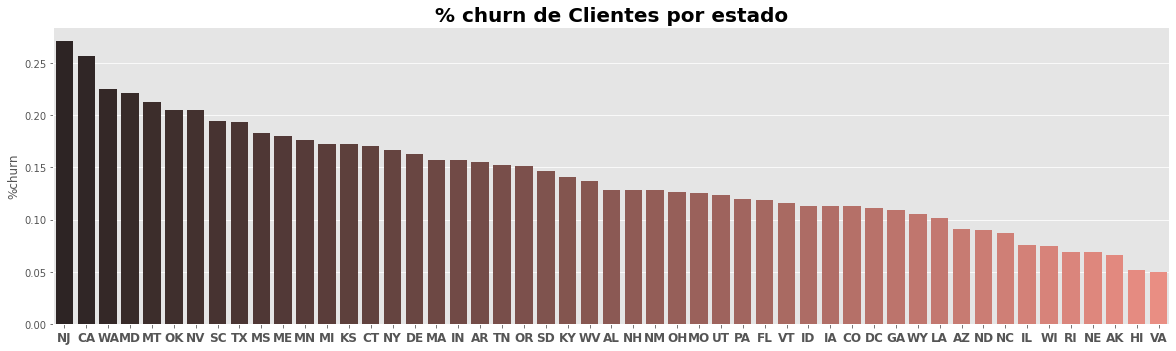

In [13]:
# definindo a área de plotagem
fig = plt.figure(figsize=(20,12))

# plotando o gráfico por estados
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3, rowspan=1)
sns.barplot(x='state', y='%churn', data = state_churn, palette='dark:salmon')
_, xlabels = plt.xticks()
ax1.set_xticklabels(xlabels, size=12, fontweight='bold')
ax1.set(xlabel=None)
ax1 = plt.title("% churn de Clientes por estado", fontsize=20, fontweight='bold')

* Podemos observar, tanto pelo mapa quanto pelo gráfico, que os estados com maior taxa de churn é o esta NJ (Nova Jersey), seguido da CA (Califórnia) e com menor taxa é o estado da VA (Virgínia).

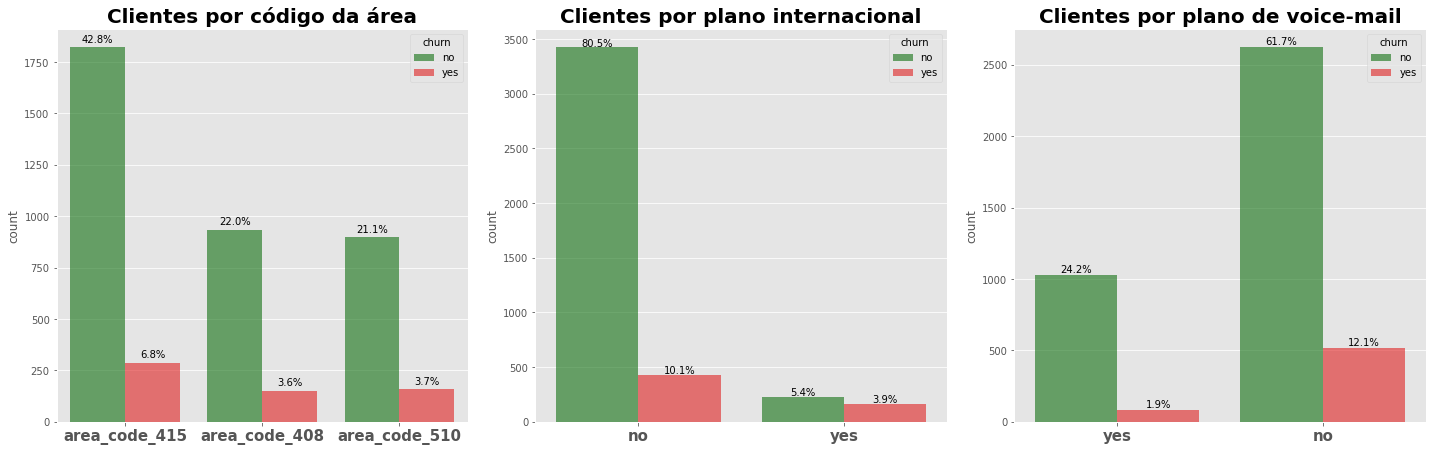

In [14]:
# definindo a área de plotagem
fig = plt.figure(figsize=(20,12))

# plotando o gráfico por area_code
ax2 = plt.subplot2grid((2,3), (1,0))
area_code_plot = sns.countplot(x='area_code', data = train_obj, hue='churn', ax=ax2, palette= ["green", "red"], alpha=0.6)
for p in area_code_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(train_obj)))
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 40
    area_code_plot.annotate(percentage,(x,y), ha = 'center', va = 'center')
_, xlabels = plt.xticks()
ax2.set_xticklabels(xlabels, size=15, fontweight='bold')
ax2.set(xlabel=None)
ax2 = plt.title("Clientes por código da área", fontsize=20, fontweight='bold')

# plotando o gráfico por international_plan
ax3 = plt.subplot2grid((2,3), (1,1))
inter_plan = sns.countplot(x='international_plan', data = train_obj, hue='churn', ax=ax3, palette= ["green", "red"], alpha=0.6)
for p in inter_plan.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(train_obj)))
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 40
    inter_plan.annotate(percentage,(x,y), ha = 'center', va = 'center')
_, xlabels = plt.xticks()
ax3.set_xticklabels(xlabels, size=15, fontweight='bold')
ax3.set(xlabel=None)
ax3 = plt.title("Clientes por plano internacional", fontsize=20, fontweight='bold')

# plotando o gráfico por voice_mail_plan
ax4 = plt.subplot2grid((2,3), (1,2))
voice_mail = sns.countplot(x='voice_mail_plan', data = train_obj, hue='churn', ax=ax4, palette= ["green", "red"], alpha=0.6)
for p in voice_mail.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(train_obj)))
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 40
    voice_mail.annotate(percentage,(x,y), ha = 'center', va = 'center')
_, xlabels = plt.xticks()
ax4.set_xticklabels(xlabels, size=15, fontweight='bold')
ax4.set(xlabel=None)
ax4 = plt.title("Clientes por plano de voice-mail", fontsize=20, fontweight='bold')

# exibindo os gráficos
plt.tight_layout()
plt.show()

* Os gráficos acima nos mostra a quantidade e a % do total, porém não é um leitura totalmente correta, podemos observar que naturalmente todas as barras maiores tem uma quantidade maior de churn, isso pode ocorrer em função do volume, quanto maior seu total, maior serão as oportunidades de churn.

* Então abaixo vamos extrair a proporção de cada variável, assim ficará mais justo, semelhante à análise do gráfico por estado.

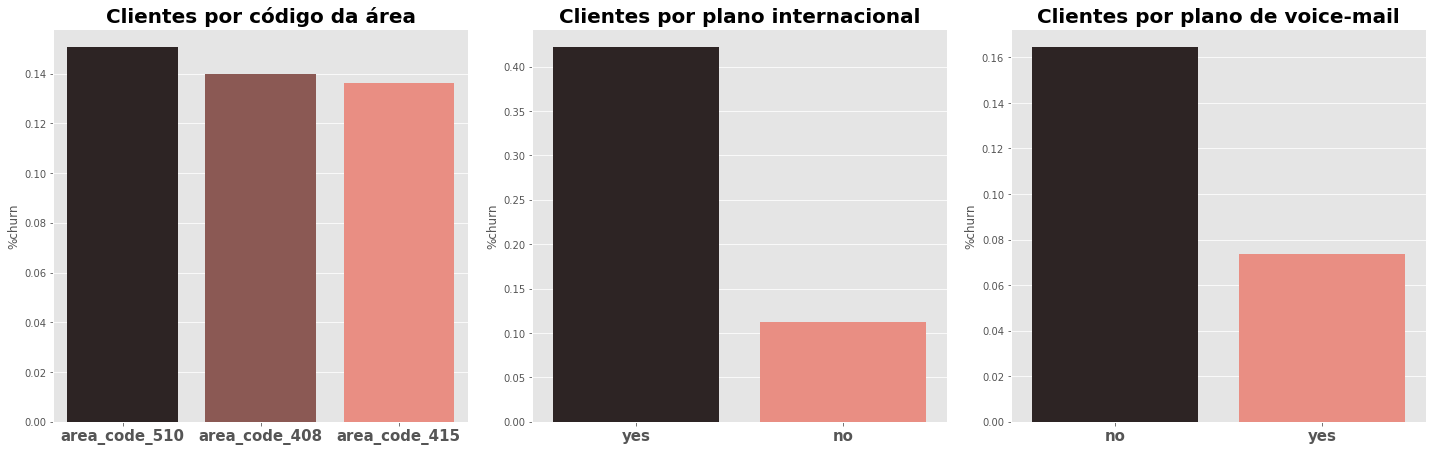

In [15]:
# definindo a área de plotagem
fig = plt.figure(figsize=(20,12))

# plotando o gráfico por area_code

area_code_churn = extrai_proporcao_churn('area_code', train_obj)

ax1 = plt.subplot2grid((2,3), (1,0))
area_code_plot = sns.barplot(x='area_code', y='%churn', data = area_code_churn, palette='dark:salmon')
_, xlabels = plt.xticks()
ax1.set_xticklabels(xlabels, size=15, fontweight='bold')
ax1.set(xlabel=None)
ax1 = plt.title("Clientes por código da área", fontsize=20, fontweight='bold')

# plotando o gráfico por international_plan

international_plan_churn = extrai_proporcao_churn('international_plan', train_obj)

ax2 = plt.subplot2grid((2,3), (1,1))
inter_plan = sns.barplot(x='international_plan', y='%churn', data = international_plan_churn, palette='dark:salmon')
_, xlabels = plt.xticks()
ax2.set_xticklabels(xlabels, size=15, fontweight='bold')
ax2.set(xlabel=None)
ax2 = plt.title("Clientes por plano internacional", fontsize=20, fontweight='bold')

# plotando o gráfico por voice_mail_plan

voice_mail_plan_churn = extrai_proporcao_churn('voice_mail_plan', train_obj)

ax3 = plt.subplot2grid((2,3), (1,2))
voice_mail = sns.barplot(x='voice_mail_plan', y='%churn', data = voice_mail_plan_churn, palette='dark:salmon')
_, xlabels = plt.xticks()
ax3.set_xticklabels(xlabels, size=15, fontweight='bold')
ax3.set(xlabel=None)
ax3 = plt.title("Clientes por plano de voice-mail", fontsize=20, fontweight='bold')

# exibindo os gráficos
plt.tight_layout()
plt.show()

* Comparando os gráficos de Clientes por área, podemos observar que em quantidade absoluta o número maior de churn é da área 415, enquanto que proporcionalmente a área 510 é o que tem o maior número de churn.

* Clientes que possuem Plano Internacional cancelam mais contratos do que os que não tem.

* Clientes que não tem plano de voice-mail tendem a cancelar mais pedidos dos que tem esse plano.

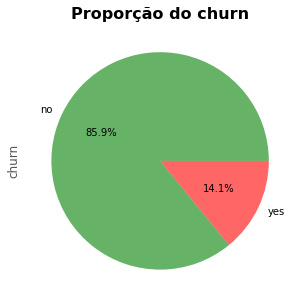

In [16]:
# definindo a área de plotagem
fig = plt.figure(figsize=(5, 5))

# plotando o gráfico de pizza
train.churn.value_counts().plot.pie(autopct="%.1f%%", colors = ['green', 'red'], wedgeprops={'alpha':0.6});
plt.title('Proporção do churn', fontsize=16, fontweight='bold')

# exibindo o gráfico
plt.show()

* Checando nossa variável alvo, podemos observar que a no geral, 14% dos clientes cancelam os contratos.

### 2.3 Análise das Variáveis numéricas

Vamos plotar as distribuições de cada variável numérica e avaliar os comportamentos.

In [17]:
# definindo o dicionário
target = {'yes':1, 'no':0}

# convertendo string em binário
train['churn_bin'] = train.churn.map(target)

# removendo a variável attrition original
train = train.drop(['churn'], axis=1)

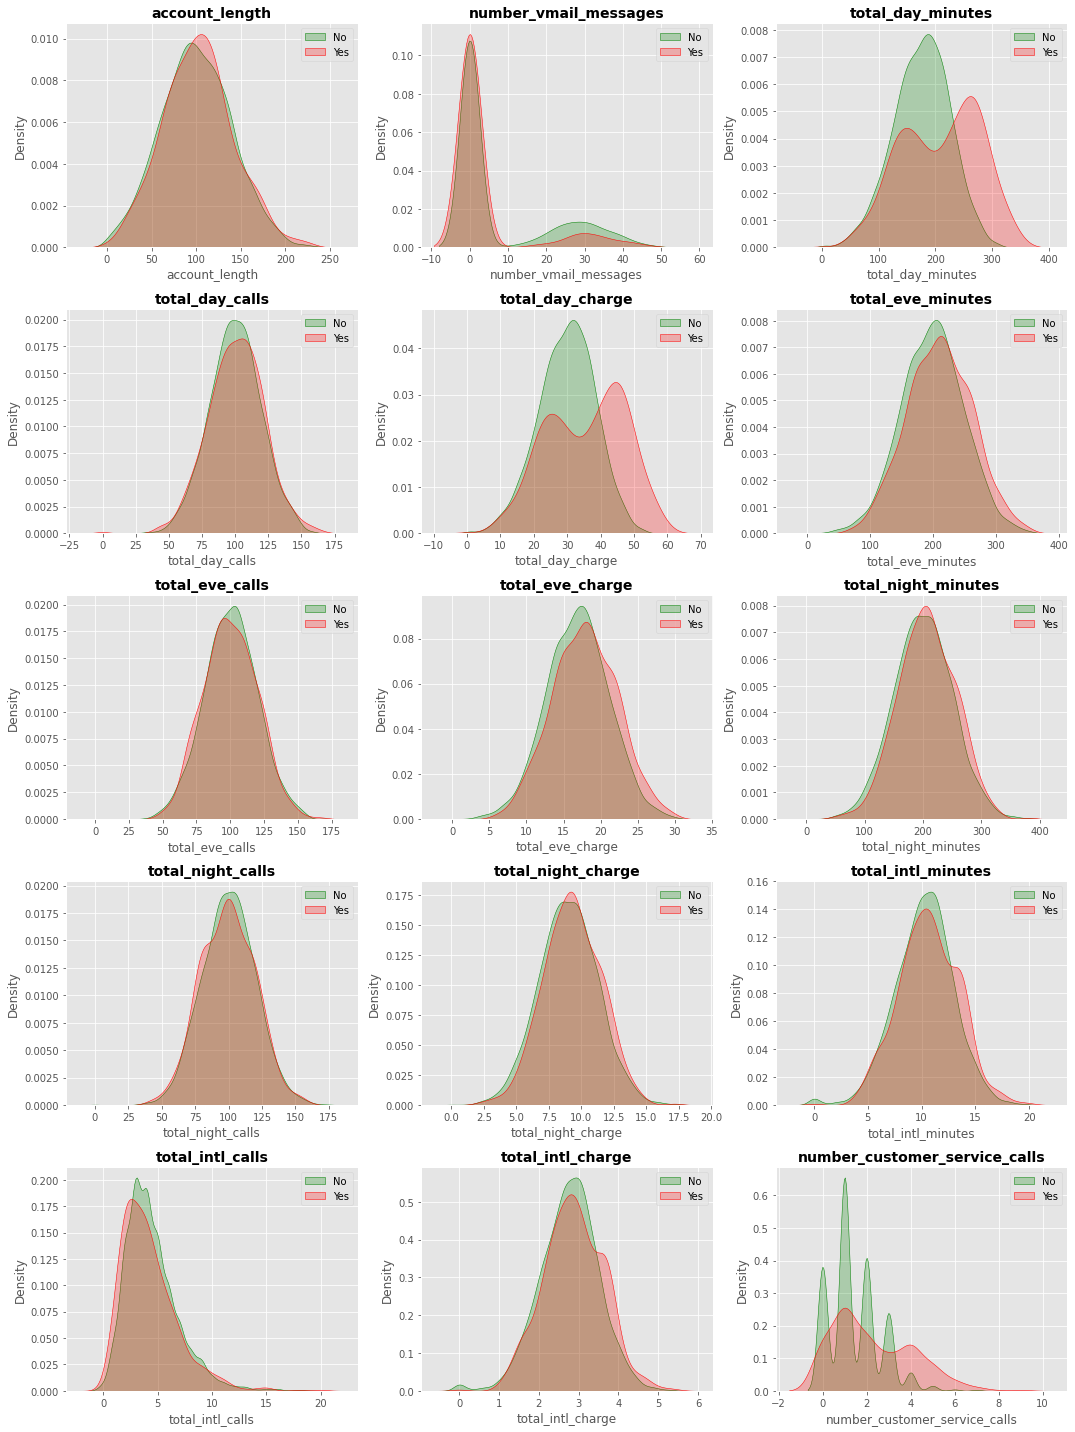

In [18]:
# selecionando o tipo de dados para o conjunto numérico
train_num = train.select_dtypes(include=np.number)

# removendo algumas colunas
colunas = train_num.drop('churn_bin', axis=1).columns

# contando a quantidade de features para o loop
# num_plots = len(colunas)

# separando as classes para a visibilidade
train_class_no  = train_num[train_num.churn_bin == 0]
train_class_yes = train_num[train_num.churn_bin == 1]

# definindo a área de plotagem
nrow = 5
ncol = 3
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,20))
fig.subplots_adjust(hspace=1, wspace=1)

# plotando gráfico de densidade
idx = 0
for col in colunas:
    idx += 1
    plt.subplot(nrow, ncol, idx)
    sns.kdeplot(train_class_no[col], label="No", shade=True, color='green')
    sns.kdeplot(train_class_yes[col], label="Yes", shade=True, color='red')
    plt.title(col, fontsize=14, fontweight='bold')
    plt.legend()

plt.tight_layout()
plt.show()
# plt.savefig('density.png')

* Podemos observar um comportamento similiar das variáveis, próximo de uma normal, comparando o churn, exceto o comportamento das variáveis: *total_day_minutes*, *total_day_charge* e *number_customer_service_calls*.

* *total_day_minutes* observamos que a tendência de churn é quando o total de minutos diários é maior, próximos dos 300.

* *total_day_charge* observamos que a tendência de churn é quando o total de carga diária é maior, em torno de 45.

* *number_customer_service_calls* essa variável difere do comportamento das demais, o churn se dá com uma média de 1 chamada em média e um pouco mais com 4 chamadas.

* Nessas 3 variáveis avaliadas, podemos observar que há dois picos na curva (um sempre maior), mas sugere que temos dois tipos de população diferentes e essas variáveis deveriam ser avaliadas um pouco mais para entender o padrão dos clientes e se realmente se diferem em alguma característica.

### 2.4 Analisando os outliers

Os outliers podem influenciar nas análises e no treinamento do modelo preditivo.

Para plotar o boxplot com o seaborn, precisamos utilizar o método *melt* do pandas para termos um dataframe de duas colunas, no qual a primeira será todas as variáveis e a segunda, seus respectivos valores.

Vou plotar e avaliar de forma separada, por churn (yes/no).

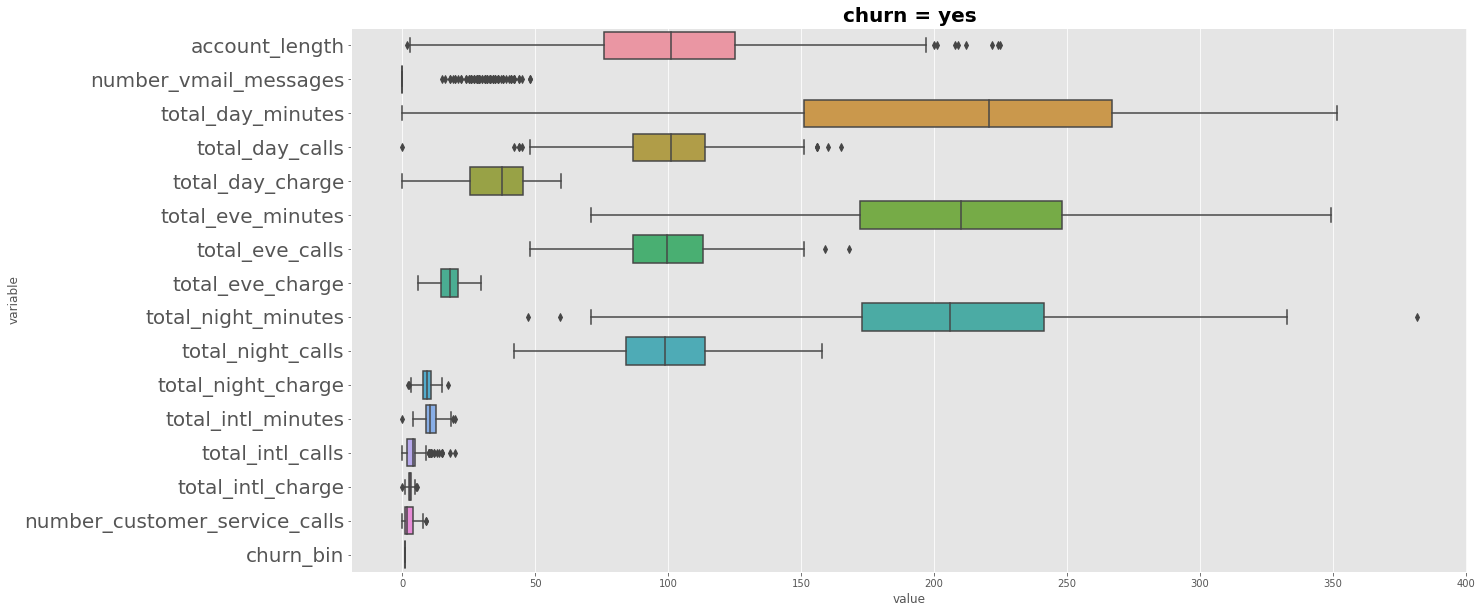

In [19]:
# criando o dataframe para o plot dos clientes que cancelaram o contrato
df_box_churn_yes = train_num[train_num.churn_bin == 1].melt(value_vars=train_num[train_num.churn_bin == 1].columns)

# definindo a área de plotagem
plt.figure(figsize=(20,10))

# plotando o gráfico
by=sns.boxplot(y='variable', x='value', data=df_box_churn_yes)
plt.title('churn = yes', fontsize=20, fontweight='bold')
by.set_yticklabels(by.get_ymajorticklabels(), fontsize = 20)

# exibindo o gráfico
plt.show()

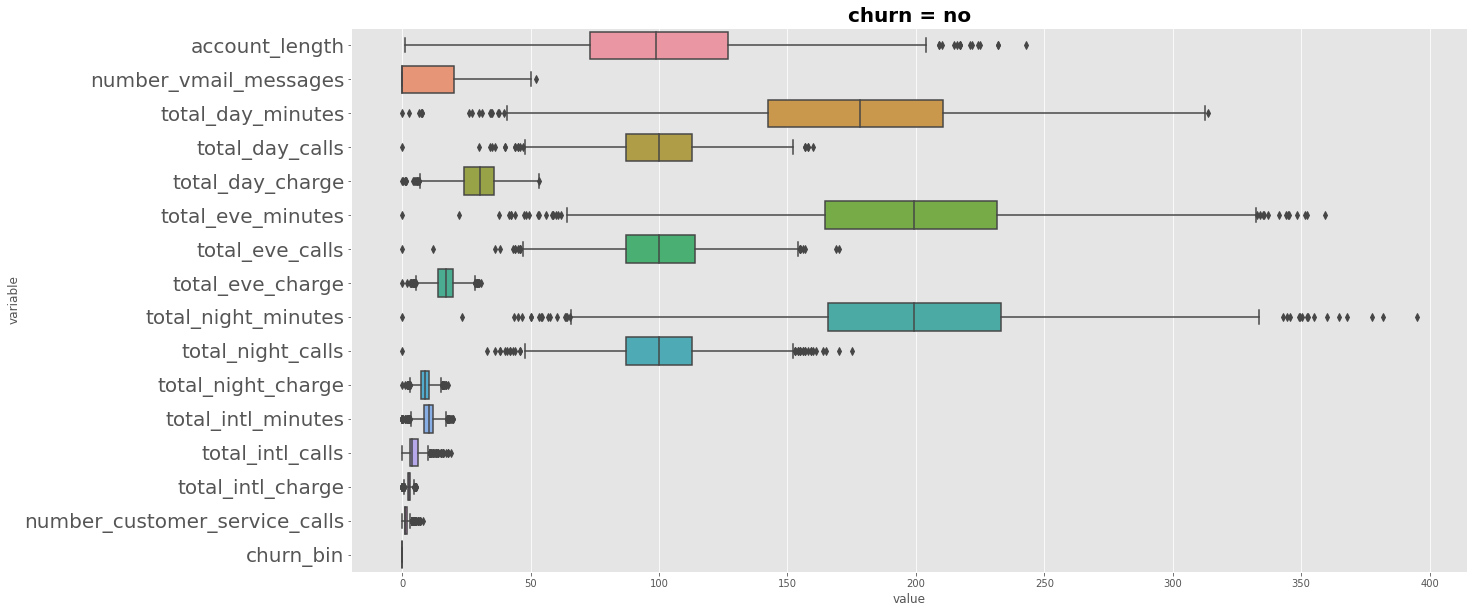

In [20]:
# criando o dataframe para o plot dos clientes que não cancelaram o contrato
df_box_churn_no = train_num[train_num.churn_bin == 0].melt(value_vars=train_num[train_num.churn_bin == 0].columns)

# definindo a área de plotagem
plt.figure(figsize=(20,10))

# plotando o gráfico
bn=sns.boxplot(y='variable', x='value', data=df_box_churn_no)
plt.title('churn = no', fontsize=20, fontweight='bold')
bn.set_yticklabels(bn.get_ymajorticklabels(), fontsize = 20)

# exibindo o gráfico
plt.show()

* Observamos que temos outliers em todas as variáveis, independento de churn, mas a princípio vou optar em treinar o modelo com esses outliers e dependendo do resultado posso vir e ver a melhor forma de remover.

### 2.5 Análise de correlação

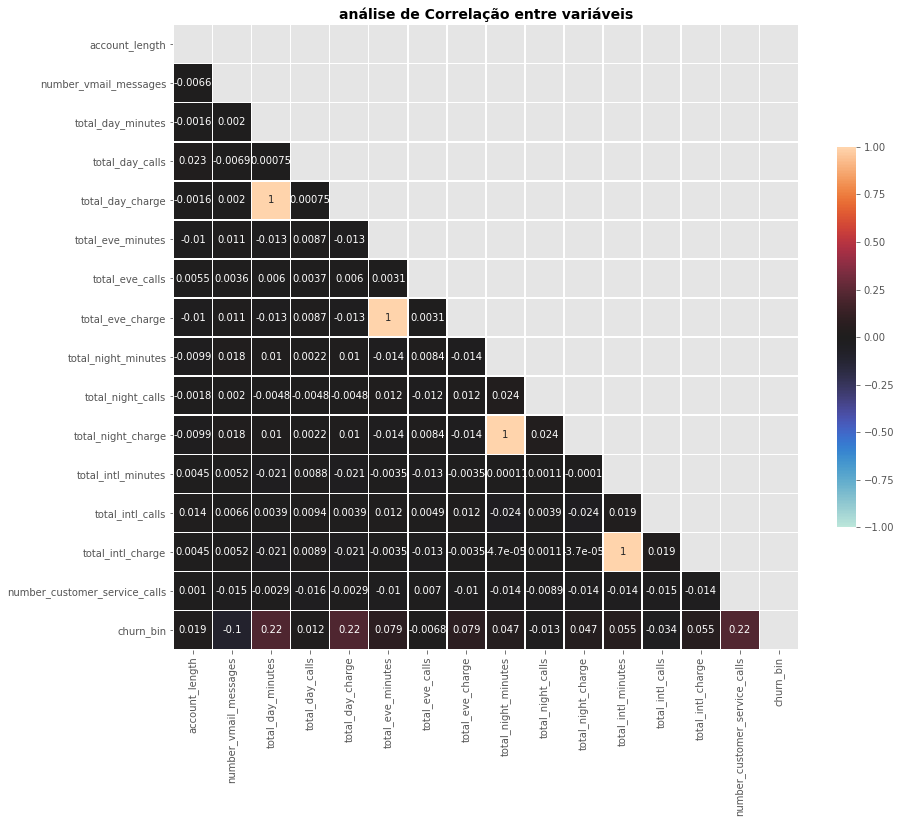

In [21]:
# gerando uma máscara para o formato do gráfico
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# definindo a área de plotagem
fig = plt.figure(figsize=(14,14))

# criando o objeto com as correlações
correl = train.corr()

# plotando o gráfico
sns.heatmap(data=correl, mask=mask, vmin=-1, vmax=1, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('análise de Correlação entre variáveis', fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

* Podemos observar nessa análise que temos 3 "pares" de variáveis que são altamente correlacionadas positivamente e essas variáveis podem ter um peso maior para o modelo.

* Vou optar em remover um de cada duas variáveis altamente correlacionadas e testar o modelo.

In [22]:
# removendo uma de cada duas variáveis correlacionadas
train.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis=1, inplace=True)

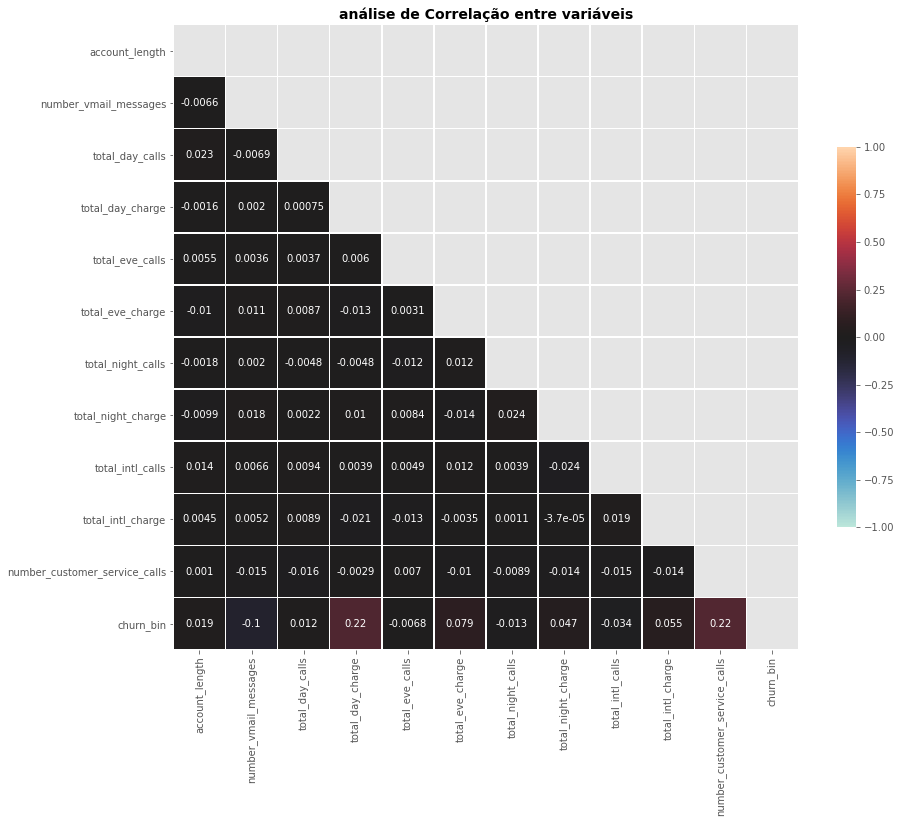

In [23]:
# gerando uma máscara para o formato do gráfico
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# definindo a área de plotagem
fig = plt.figure(figsize=(14,14))

# criando o objeto com as correlações
correl = train.corr()

# plotando o gráfico
sns.heatmap(data=correl, mask=mask, vmin=-1, vmax=1, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('análise de Correlação entre variáveis', fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

* Podemos observar também algumas variáveis que correlacionam com a vaiável alvo, as que mais correlacionam são *total_day_charge* e *number_customer_service_calls*, mesmo não sendo tão forte a correlação.

## 3. Machine Learning

Agora vamos começar a modelar para treinar o modelo para realizar as previsões de churn.

Como temos um dataset para teste no qual nem tocamos nele ainda e este servirá somente para o teste final, simulando dados em produção que nosso modelo nunca viu.

Teremos que fazer algumas transformações, então primeiro de tudo vamos criar uma cópia do dataset de treino original, caso precisamos voltar, não precisa ser do começo.

In [24]:
# criando uma cópia do original
train_transform = train.copy()

Vamos começar separando as variáveis preditoras (X) da variável alvo, churn (y)

Então vamos separar o conjunto de treino em treino e validação.

Isso servirá para uma análise inicial com vários modelos inicialmente, analisando os resultados sem nenhum tipo de alteração.

Mas depois vamos utilizar o *RandomizedSearchCV* e análise dos hiperparâmetros.

In [25]:
# definindo X e y
X = train_transform.drop(['churn_bin'], axis=1)
y = train_transform.churn_bin

# separando em treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 3.1 Definindo a baseline

Ao invés de prever com um modelo simples, vamos utilizar esta métrica tirada desse [artigo](https://towardsdatascience.com/calculating-a-baseline-accuracy-for-a-classification-model-a4b342ceb88f) (recomendo a leitura para entendimento) de Classificador de taxa aleatória (estimativa ponderada), para ver qual seria nossa precisão se adivinhassemos as porcentagens ponderadas de cada classe.

Com base na variável churn, podemos extrair a porcentagem de cada classe e realizar o cálculo abaixo.

In [26]:
print(f'Odds of Guessing Minority Correct: 0.141 * 0.141 = {0.141 * 0.141:.4f}')
print(f'Odds of Guessing Majority Correct: 0.859 * 0.859 = {0.859 * 0.859:.4f}')
print()
print(f'Baseline = 0.141**2 + 0.859**2 = {0.141**2 + 0.859**2:.4f} ou {(0.141**2 + 0.859**2)*100:.2f}%')

Odds of Guessing Minority Correct: 0.141 * 0.141 = 0.0199
Odds of Guessing Majority Correct: 0.859 * 0.859 = 0.7379

Baseline = 0.141**2 + 0.859**2 = 0.7578 ou 75.78%


O valor de acurácia (em conjunto com outras métricas de classificação) deve "bater": **75.78%**.

### 3.2 Escolha do Modelo

Sem qualquer tipo de modificação nos dados, vamos rodar alguns modelos e avaliar suas performances.

In [27]:
# selecionando variaveis numericas
numeric_features = X_train.select_dtypes(np.number).columns.tolist()

# instanciando o StandarScaler para padronização das variáveis
numeric_transformer = StandardScaler()

# selecionando variaveis categoricas
categorical_features = X_train.select_dtypes('object').columns.tolist()

# instanciando one hot encoder para transformação das variáveis
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# criando o pipeline para conversão
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

In [28]:
# definindo uma lista de modelos
list_models = [('LOGISTIC REGRESSION', LogisticRegression(solver='lbfgs')),
               ('DECISION TREE', DecisionTreeClassifier()),
               ('KNN', KNeighborsClassifier()),
               ('SVC', SVC()),
               ('RANDOM FOREST', RandomForestClassifier(n_estimators=1000)),
               ('XGB', XGBClassifier())]

In [29]:
# criando um loop passando a lista de modelos para escolha do melhor
for name, model in list_models:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)

    print(name)
    print('-------------------------------------------------------')
    print('train','\t ',train_score)
    print('validação', valid_score,'\n')
    print(classification_report(y_valid, clf.predict(X_valid)))
    print('=======================================================\n')

LOGISTIC REGRESSION
-------------------------------------------------------
train 	  0.8766386554621849
validação 0.8603921568627451 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1096
           1       0.51      0.27      0.35       179

    accuracy                           0.86      1275
   macro avg       0.70      0.61      0.64      1275
weighted avg       0.84      0.86      0.84      1275


DECISION TREE
-------------------------------------------------------
train 	  1.0
validação 0.9176470588235294 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1096
           1       0.70      0.73      0.71       179

    accuracy                           0.92      1275
   macro avg       0.83      0.84      0.83      1275
weighted avg       0.92      0.92      0.92      1275


KNN
-------------------------------------------------------
train 	  0.9065546218487395
validaç

### 3.3 Ajustando o modelo

Com os resultados acima, podemos ver que o XGBoost teve um resultado um pouco superior que a Random Forest. Nesta versão de treinamento do modelo vamos utilizar a Random Forest, porque o resultado da XGB não foi tão superior e também porque a Random Forest é mais simples de ajustar os hiperparâmetros.

In [30]:
# definindo regras para transformações das variáveis numéricas e categóricas
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

# definindo um pipeline com o pre-processamento e a random forest
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clf', RandomForestClassifier(random_state=42))])

# critério de separação
criterion = ['gini', 'entropy']

# número de árvores
n_estimators = [200, 400, 600, 800, 1000, 1100, 1200, 1400, 1600, 1800, 2000]

# número de variáveis em cada separação
max_features = ['auto', 'sqrt']

# número máximo de níveis da árvore
max_depth = [10, 20, 30, 40, 60, 80, 90, 100, None]

# número mínimo de amostras requeridas em cada separação do nó
min_samples_split = [2, 5, 10]

# número mínimo de amostras requeridas em cada folha do nó
min_samples_leaf = [1, 2, 4]

# método de seleção das amostras em cada árvore
bootstrap = [True, False]

# definição para peso das classes
class_weight = ['balanced', 'balanced_subsample', None]

# definindo o grid para o treinamento
grid_params_rf = [{'clf__criterion': criterion,
                   'clf__n_estimators': n_estimators,
                   'clf__max_features': max_features,
                   'clf__max_depth': max_depth,
                   'clf__min_samples_split': min_samples_split,
                   'clf__min_samples_leaf': min_samples_leaf,
                   'clf__bootstrap': bootstrap,
                   'clf__class_weight': class_weight}]

# imprimindo o resultado do grid
pprint(grid_params_rf)

[{'clf__bootstrap': [True, False],
  'clf__class_weight': ['balanced', 'balanced_subsample', None],
  'clf__criterion': ['gini', 'entropy'],
  'clf__max_depth': [10, 20, 30, 40, 60, 80, 90, 100, None],
  'clf__max_features': ['auto', 'sqrt'],
  'clf__min_samples_leaf': [1, 2, 4],
  'clf__min_samples_split': [2, 5, 10],
  'clf__n_estimators': [200,
                        400,
                        600,
                        800,
                        1000,
                        1100,
                        1200,
                        1400,
                        1600,
                        1800,
                        2000]}]


Temos duas opções, utilizar o *GridSearchCV* que fará todas as combinações possíveis dos hiperparâmetros do modelo ou *RandomizedSearchCV* que as combinações serão aleatórias.

Vamos optar pela segunda opção, pois a primeira opção podemorar muito e segundo estudos, não diferença significativa entre os dois métodos.

In [31]:
# definido os parâmetros para o RandomizedSearchCV
RFC_RandomSearch = RandomizedSearchCV(estimator=pipe_rf, 
                                      param_distributions=grid_params_rf, 
                                      n_iter = 100, 
                                      cv = 3, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs = -1)

# treinando o modelo randomico
RFC_RandomSearch.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.6min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['account_length',
                                                                                'number_vmail_messages',
                                                                                'total_day_calls',
                                                                                'total_day_charge',
                                                                                'total_eve_calls',
                                                                                'total_eve_charge',
                                                                                'total_night_calls',
                            

In [32]:
# Verificando os melhores hiperparâmetros encontrados pelo modelo
RFC_RandomSearch.best_params_

{'clf__n_estimators': 800,
 'clf__min_samples_split': 5,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 'auto',
 'clf__max_depth': 30,
 'clf__criterion': 'entropy',
 'clf__class_weight': 'balanced_subsample',
 'clf__bootstrap': False}

In [33]:
# definindo um objeto com os melhores estimadores encontrados
best_random_RF = RFC_RandomSearch.best_estimator_

# treinando o modelo
best_random_RF.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'number_vmail_messages',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls']),
                                                 ('cat',
                                  

### 3.4 Avaliando o modelo

In [34]:
# checando os resultados com dados treino (acurácia) e validação (acurácia e outros)
train_score = best_random_RF.score(X_train, y_train)
valid_score = best_random_RF.score(X_valid, y_valid)
print('train','\t ',train_score)
print('validação', valid_score,'\n')
print(classification_report(y_valid, best_random_RF.predict(X_valid)))

train 	  1.0
validação 0.9505882352941176 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1096
           1       0.95      0.68      0.79       179

    accuracy                           0.95      1275
   macro avg       0.95      0.84      0.88      1275
weighted avg       0.95      0.95      0.95      1275



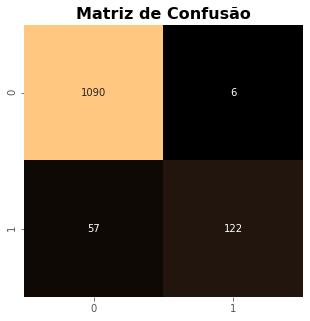

In [35]:
# definindo a área de plotagem
plt.figure(figsize=(5,5))

# plotando o gráfico
sns.heatmap(confusion_matrix(y_valid, best_random_RF.predict(X_valid)), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')

# exibindo o gráfico
plt.show()

* Podemos observar que quando a classe é zero, ou seja, prevê que o cliente não cancelará o contrato temos 95% de precisão e 99% de recall, enquanto que com a classe mais importante no nosso caso, também temos 95% de precisão e apenas 68% de recall.

* Na minha leitura, mesmo utilizando o parametro para balancear nos hiperparametros, eu acho que o desbalanceamento está afetando o modelo.

* Poderíamos tentar melhorar com algumas técnicas para balanceamento das classes ou analisar mais profundamente esta classe, tentar encontrar algum padrão ou criar mais alguma feature que ajuda o modelo.

* Embora o recall seja baixo, ele está prevendo mais FP do que FN (considerando o churn da classe yes como positivo), ou seja, em 57 casos de 122, o modelo prevê que haverá o churn e não houve, enquanto em apenas 6 de 1090 casos ele prevê que não terá e teve o churn, qual é pior?

* Nos dois casos devemos tentar no mínimo encontrar um balanceamento, melhorar o quanto possível, mas neste caso, se o modelo prevê que o cliente irá cancelar e ele não cancela, é melhor do que o oposto, o modelo dizer que o cliente não irá e acaba cancelando.

* o f1-score que mostra o balanço entre a precisão e o recall não está tão ruim para os dois casos.

Agora vamos analisar mais duas métrica a curva ROC e a Precision Recall. Vamos criar um objeto Kfold, para separar o dataset em 5 partes e em seguida criar uma função para rodar o modelo com essas 5 partes amostrais do conjunto e analisar os resultados.

In [36]:
# criando um objeto com stratified kfold
StratifKfold = StratifiedKFold(n_splits=5, shuffle=False, random_state=42)

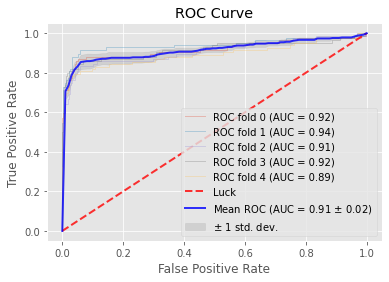

In [37]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_random_RF, StratifKfold, X_train, y_train, title='ROC Curve')

* O resultado ideal é que quanto mais à esquerda superior a curva estiver, melhor é o resultado do modelo.

* O nosso modelo deu como resultado uma média de 91% e um desvio padrão de +/-1.

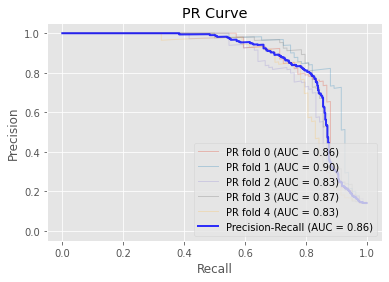

In [38]:
# criando uma função para plotar o gráfico
def draw_cv_pr_curve(classifier, cv, X, y, title='PR Curve'):
    # definindo algumas listas vazias para receber o resultado
    y_real = []
    y_proba = []

    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        
        # computando a curva ROC e AUC
        precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])

        # plotando a Precision-Recall da validação cruzada em individualmente
        plt.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))

        y_real.append(y.iloc[test])
        y_proba.append(probas_[:, 1])

        i += 1
    
    # concatenando os valores da lista
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    # calculando a Precision-Recall
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    
    # plotando as médias dos resultados
    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=.8)

    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()

# executando função e plotando a Curva Precision-Recall
draw_cv_pr_curve(best_random_RF, StratifKfold, X_train, y_train, title='PR Curve')

* Neste caso quanto mais superior à direita a curva estiver, melhor será o resultado.

* O resultado médio, entre o balanço da Precision e Recall, foi de 86%, se necessário podemos contrabalancear o resultado para o modelo poder aumentar mais de um e diminuir do outro.

* Neste caso, a princípio, vou optar em manter dessa forma.

### 3.5 Variáveis importantes

Vamos dar uma olhada quais são as variáveis que mais influenciam o modelo, esse resultado pode nos auxiliar, caso precisar mexer em alguma variável posteriormente, com o objetivo de melhorar a performance do modelo.

Como utilizamos uma pipeline, vamos ter que extrair essas informações primeiro, pois neste modelo foi utilizado one-hot-encode e ele criou várias outras colunas, que não existe no dataset original.

Então faremos uso da biblioteca eli5 para extrair as importancias.

In [39]:
# criando um objeto para extrair informações do dataset com one-hot-encode
onehot_columns = list(best_random_RF.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names(input_features=categorical_features))

In [40]:
# criando uma lista com as colunas do conjunto
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

In [41]:
# exibindo as importancias das variáveis
eli5.explain_weights(best_random_RF.named_steps['clf'], top=20, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')

Explanation(estimator="RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',\n                       criterion='entropy', max_depth=30, min_samples_split=5,\n                       n_estimators=800, random_state=42)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='total_day_charge', weight=0.22756959999336085, std=0.03547914117199672, value=None), FeatureWeight(feature='number_customer_service_calls', weight=0.12626148182231522, std=0.030874030195676964, value=None), FeatureWeight(feature='total_eve_charge', weight=0.07494318961101623, std=0.01665371706372104, value=None), FeatureWeight(feature='total_intl_charge', weight=0.06179734900170033, std=0.015711268853955674, value=None), FeatureWeight(feature='total_night_charge', weight=0.05385872073390448, std=0.014461598649866743, value=None), FeatureWeight(feature='account_length', weight=0.04413237608665003, std=0.012984831388857076, value=None), FeatureWeight(feature='total_day_calls', weight=0.043819526521402745, std=0.012732980638230456, value=None), FeatureWeight(feature='total_intl_calls', weight=0.04285783441888711, std=0.01276722249034118, value=None), FeatureWeight(feature='international_plan_yes', weight=0.04224053954930772, std=0.03215950897645983, value=None), FeatureWeight(feature='total_night_calls', weight=0.04223668566748194, std=0.012499891571753958, value=None), FeatureWeight(feature='total_eve_calls', weight=0.04053918114493274, std=0.012269501903149961, value=None), FeatureWeight(feature='international_plan_no', weight=0.04031151715295803, std=0.0317225798874143, value=None), FeatureWeight(feature='number_vmail_messages', weight=0.022563363130354095, std=0.014022549924861525, value=None), FeatureWeight(feature='voice_mail_plan_yes', weight=0.011923037873630636, std=0.013000698335982244, value=None), FeatureWeight(feature='voice_mail_plan_no', weight=0.011734689543081354, std=0.012890532530062358, value=None), FeatureWeight(feature='area_code_area_code_415', weight=0.0066791772271928024, std=0.0039531078721090395, value=None), FeatureWeight(feature='area_code_area_code_510', weight=0.006551438010853514, std=0.003888979117104678, value=None), FeatureWeight(feature='area_code_area_code_408', weight=0.0057227386497340355, std=0.0034110404561219156, value=None), FeatureWeight(feature='state_OH', weight=0.0034591140579467165, std=0.002904742037884114, value=None), FeatureWeight(feature='state_IN', weight=0.003241578582537217, std=0.002766871204154645, value=None)], remaining=49), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## 4. Treinamento com todos os dados

Nesta etapa, faremos um treinamento final com todos os dados de treino que temos. No caso, se tivemos, divididos o conjunto para treinar e validar para parametrizar o modelo, agora juntariamos tudo, realiza-se o treinamento completo e vamos agora testar naquele conjunto de dados que não utilizamos em momento algum.

Isso é o mais próximo, no ambiente de testes, de um modelo em produção, no qual você não conhece os dados que vão vir.

In [42]:
# treinando o modelo com todos os dados e os melhores hiperparametos ajustados encontrados
best_random_RF.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'number_vmail_messages',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls']),
                                                 ('cat',
                                  

In [43]:
# prevendo os dados no conjunto de TREINAMENTO
print(classification_report(y, best_random_RF.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3652
           1       1.00      1.00      1.00       598

    accuracy                           1.00      4250
   macro avg       1.00      1.00      1.00      4250
weighted avg       1.00      1.00      1.00      4250



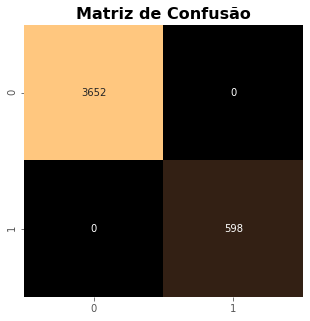

In [44]:
# definindo a área de plotagem
plt.figure(figsize=(5,5))

# plotando o gráfico
sns.heatmap(confusion_matrix(y, best_random_RF.predict(X)), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')

# exibindo o gráfico
plt.show()

Nos dados de treino o modelo acertou 100%, agora precisamos analisar se não haverá muita diferença em um conjunto que o modelo não conhece, ou seja, a possibilidade de overfitting.

## 5. Salvando o modelo

Agora vamos salvar o modelo para utilizar futuramente utilizar em uma aplicação.

In [45]:
# criando o objeto com o nome do modelo
filename_model = 'RF_model_trained.sav'

# salvando o modelo em disco
pickle.dump(best_random_RF, open(filename_model, 'wb'))

# importando o modelo treinado salvo em disco
loaded_model = pickle.load(open('RF_model_trained.sav', 'rb'))

## 6. Prevendo nos dados de teste

Agora chegou o momento de analisar se o modelo realmente performa bem.

Vamos importar o conjunto de dados, manualmente remover as variáveis que removemos para treinar o modelo.

Realizar as predições.

In [46]:
# importando o conjunto de dados de teste
train = pd.read_csv("../dados/train.csv")
test = pd.read_csv("../dados/test.csv")

# salvando uma cópia do conjunto original de testes
test_df = test.copy()

# removendo as variáveis
test_df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis=1, inplace=True)

# prevendo e colocando o resultado no conjunto
test_df['Predict'] = loaded_model.predict(test_df)

# colocando as probabilidade do modelo para cada classe
test_df['Proba_0'] = loaded_model.predict_proba(test_df)[:,0]
test_df['Proba_1'] = loaded_model.predict_proba(test_df)[:,1]

# checando o resultado com as respectivas probabilidades
test_df[['Predict', 'Proba_0', 'Proba_1']]

Predict   Proba_0   Proba_1
0          0  0.986421  0.013579
1          0  0.870790  0.129210
2          1  0.470640  0.529360
3          0  0.978428  0.021572
4          0  0.869329  0.130671
..       ...       ...       ...
745        0  0.963398  0.036602
746        0  0.901698  0.098302
747        0  0.943112  0.056888
748        0  0.937469  0.062531
749        0  0.965136  0.034864

[750 rows x 3 columns]

## 7. Salvando os dados com as previsões

Como este conjunto de dados foi extraido do kaggle, o conjunto de testes não tem o resultado da classe churn para comparar.

Então vou submeter o meu resultado na plataforma para obter o resultado.

In [47]:
# importando o arquivo para submeter o resultado
sampleSubmission = pd.read_csv("../dados/sampleSubmission.csv")

# colocando no formato correto
sampleSubmission = sampleSubmission.merge(test_df[['id', 'Predict']], on='id', how='left').drop(['churn'], axis=1)

# renomeando a coluna
sampleSubmission = sampleSubmission.rename(columns={'Predict':'churn'})

# colocando nome da classe, como do início
sampleSubmission['churn'] = sampleSubmission.churn.map({0: 'no', 1: 'yes'})

# visualizando as primeiras linhas
sampleSubmission.head()

id churn
0   1    no
1   2    no
2   3   yes
3   4    no
4   5    no

In [48]:
# salvando o arquivo para submissão no kaggle
sampleSubmission.to_csv('sampleSubmission.csv', index=False)

Assim como feito acima, no conjunto de testes vou inserir as probabilidades no conjunto de treino.

Também vou juntar os dois arquivos de treino e testes e salvar um arquivo único.

In [49]:
# inserindo as previsões nos conjuntos originais
train['Predict'] = loaded_model.predict(X)
test['Predict'] = loaded_model.predict(test_df)

# colocando as probabilidade do modelo para cada classe
train['Proba_0'] = loaded_model.predict_proba(X)[:,0]
train['Proba_1'] = loaded_model.predict_proba(X)[:,1]

test['Proba_0'] = loaded_model.predict_proba(test_df)[:,0]
test['Proba_1'] = loaded_model.predict_proba(test_df)[:,1]

In [50]:
# removendo colunas e mantendo a igualdade das duas
train_new = train.drop(['churn'], axis=1)

test_new = test.drop(['id'], axis=1)

# formando um único conjunto de dados
df = pd.concat([train_new, test_new])

# salvando em disco
df.to_csv('df.csv', index=False)

## 8. Conclusões

Chegamos ao final com um resultado satisfatório, batendo a baseline com um resultado bem superior. Embora tenha sido com dados publicos e eventualmentes já tratados, a realidade do dia-a-dia não é esta. Não conheço a precendencia de conjunto e pode ser que tenha um pouco de overfitting, mas comparando o resultado com os dados treino e com os de validação não houve tanta diferença.

Há ainda diversas coisas que podemos fazer para melhorar o modelo, mas como o resultado está bem superior da baseline, vou optar em não mexer por enquanto e vou explicar o que eu faria se estivessemos lidando com um problema real.

* **Validar com o responsável pelo Negócio**;<br>
    Conhecimento do negócio é imprescindivel, se não como saberiamos que as análises e resultados estão conforme esperado? Na parte de análise exploratória, qualquer descoberta, insight ou hipótese validada ou não deve ser validado se está correto o entendimento e isso irá garantir também a qualidade dos dados.
* **Outliers**;<br>
    Os valores fora do normal podem influenciar o modelo, dependendo do seu objetivo, neste projeto vimos que todas as variáveis tem outliers e optei em seguir sem remover para ver o resultado e depois optei também em manter assim, pois não percebi sinais claros de influencia deles.
* **Modelo selecionado**;<br>
    A minha escolha foi a Random Forest, mas o XGBoot deu um resultado ligeiramente superior. Tomei essa decisão pela Random Forest ser bastante popular e pela diferença não ter sido grande, ela é mais fácil de ajustar e os dois são modelos *ensemble* de árvores de decisão.
* **Desbalanceamento das classes**;<br>
    Outro fator que influencia é desbalanceamento, sendo que somente 14% dos dados são positivos para *churn*, nos ajustes dos hiperparâmetros, parâmetro de *class_weight* resultou em *balanced_subsample*.
    > class_weight="balanced_subsample" - "balanced" modo usado para ajustar automaticamente os pesos inversamente proporcional à classe de frequencia do y na entrada dos dados como n_samples / (n_classes * np.bincount(y)).<br>
    > O modo "balanced_subsample" é o mesmo que "balanced" exceto que os pesos são computados com base na amostra do *bootstrap* para todo o crescimento da árvore. *Texto original nesse [link](https://stackoverflow.com/questions/49519409/in-the-sklearn-randomforestclassifier-is-class-weight-none-equivalent-to-class).*
    Uma técnica que poderia ser utilizado é de criar dados sintéticos, com base nos existente aumentando a quantidade da classe minoritária ou diminuir a classe majoritária ou mesclar as duas, mas optei em não utilizar também.
* **Avaliação**;<br>
    Embora a precision tenha obtido um resultado bom, a recall, principalmente da classe minoritária que é a positiva para churn pode ser melhorada, embora vimos que temos mais FP do FN, sendo que é "menos pior" que o modelo diga que terá churn e não tem, no pior dos casos, pode ser melhorado algum benefício para esses clientes, enquanto que se o modelo diz não terá e um cliente cancela, ai já não há mais o que fazer. Então também preferi manter assim a princípio, uma das formas para melhorar seria analisar as probabilidades, a partir de quanto o modelo prevê para "sim" e alterar o valor de decisão com base na curva PR.
    
    
* **Conclusão Final**;<br>
    Resumidamente essa 1ª versão do modelo com esse resultado, que julgo ser bom, colocaria em produção e monitorava, com isso você realmente irá saber se como o modelo se comporta e melhoraria se necessário, ponderando todas as análises realizadas acima.
    O valor da **baseline é 75.78%** enquanto o **resultado nos dados de teste foi de (de acordo com o kaggle): 92.95%** obtendo um melhoria de aproximadamente **18%**.

![score](resultado_kaggle.png)

Espero que tenha curtido, qualquer crítica ou sugestão será muito bem vinda, segue meus contatos:

linkedin: https://www.linkedin.com/in/carlos-bonfim/ <br>
Site portfolio: https://carlosbonfim.com/

## 9. Referências

Resultados Digitais:<br>
https://resultadosdigitais.com.br/blog/o-que-e-churn/

Documentação oficial Scikit-learn<br>
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

Kaggle<br>
https://www.kaggle.com/c/customer-churn-prediction-2020/data

Rocket Content<br>
https://rockcontent.com/br/blog/churn-rate/